# Sobre o Desafio



**Telecom X – Parte 2: Prevendo Churn**

**📣 História do Desafio**

Parabéns! 🎉 Você foi promovido após seu excelente desempenho na análise exploratória da evasão de clientes na Telecom X. Sua dedicação, clareza na comunicação dos dados e visão estratégica fizeram a diferença.

Agora, você foi convidado a integrar oficialmente a equipe de Machine Learning da empresa!

**🎯 Missão**

Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

**🧠 Objetivos do Desafio**

* Preparar os dados para a modelagem (tratamento, encoding, normalização).

* Realizar análise de correlação e seleção de variáveis.

* Treinar dois ou mais modelos de classificação.

* Avaliar o desempenho dos modelos com métricas.

* Interpretar os resultados, incluindo a importância das variáveis.

* Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

**🧰 O que você vai praticar**

✅ Pré-processamento de dados para Machine Learning
✅ Construção e avaliação de modelos preditivos
✅ Interpretação dos resultados e entrega de insights
✅ Comunicação técnica com foco estratégico

**🚀 Você agora é: Analista de Machine Learning Júnior**

A Telecom X está confiando na sua entrega para dar os próximos passos em direção a uma solução de inteligência preditiva eficaz. Boa sorte!

# Importação e tratamento dos dados

In [205]:
import pandas as pd

dados = pd.read_csv('/content/dados_normalizados.csv')
dados.head()

,Unnamed: 0,Cliente_ID,Churn,Genero,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,...,Possui_Suporte_TV,Possui_TV_Cabo,Possui_Streaming,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mes,Total_Gasto,Custo_Diario,Qtde_Servicos_Contratados
0,0,0002-ORFBO,0,Female,0,1,1,9,1,0,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,5
1,1,0003-MKNFE,0,Male,0,0,0,9,1,1,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,4
2,2,0004-TLHLJ,1,Male,0,0,0,4,1,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,3
3,3,0011-IGKFF,1,Male,1,1,0,13,1,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,6
4,4,0013-EXCHZ,1,Female,1,1,0,3,1,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,4


In [206]:
# analise das colunas existentes e o conteudo de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7043 non-null   int64  
 1   Cliente_ID                 7043 non-null   object 
 2   Churn                      7043 non-null   int64  
 3   Genero                     7043 non-null   object 
 4   Eh_Idoso                   7043 non-null   int64  
 5   Possui_Parceiro            7043 non-null   int64  
 6   Possui_Dependentes         7043 non-null   int64  
 7   Meses_Contrato             7043 non-null   int64  
 8   Possui_Telefone            7043 non-null   int64  
 9   Possui_Varias_Linhas       7043 non-null   int64  
 10  Possui_Internet            7043 non-null   object 
 11  Possui_Seguranca_Online    7043 non-null   int64  
 12  Possui_Backup              7043 non-null   int64  
 13  Possui_Protecao            7043 non-null   int64

In [207]:
# remoção das colunas não necessárias para construção do modelo
dados.drop(['Unnamed: 0', 'Cliente_ID'], axis=1, inplace=True)
dados.head()

,Churn,Genero,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Internet,Possui_Seguranca_Online,...,Possui_Suporte_TV,Possui_TV_Cabo,Possui_Streaming,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Total_Mes,Total_Gasto,Custo_Diario,Qtde_Servicos_Contratados
0,0,Female,0,1,1,9,1,0,DSL,0,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,5
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,4
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,3
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,6
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,4


# Encoding
**Transformando variaveis categoricas em numéricas**

In [208]:
# para transformação das colunas categorias em colunas numericas, vamos utilizar o get_dummies do pandas
colunas_categoricas = ['Genero', 'Possui_Internet', 'Tipo_Contrato', 'Forma_Pagamento']

dados = pd.get_dummies(data=dados, columns=colunas_categoricas, dtype=int)
dados.head()

,Churn,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Seguranca_Online,Possui_Backup,Possui_Protecao,...,Possui_Internet_DSL,Possui_Internet_Fiber optic,Possui_Internet_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Bank transfer (automatic),Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [209]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Churn                                      7043 non-null   int64  
 1   Eh_Idoso                                   7043 non-null   int64  
 2   Possui_Parceiro                            7043 non-null   int64  
 3   Possui_Dependentes                         7043 non-null   int64  
 4   Meses_Contrato                             7043 non-null   int64  
 5   Possui_Telefone                            7043 non-null   int64  
 6   Possui_Varias_Linhas                       7043 non-null   int64  
 7   Possui_Seguranca_Online                    7043 non-null   int64  
 8   Possui_Backup                              7043 non-null   int64  
 9   Possui_Protecao                            7043 non-null   int64  
 10  Possui_Suporte_TV       

# Validação da proporção dos dados e realizando balanceamento

In [210]:
# podemos ver que existe um certo desbalanceamento em relação a proporção dos dados
# temos apenas 26% dos dados de clientes de churn, o ideal é que tivessemos uma
# proporção mais equilibrada entre esses dados

dados['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


In [211]:
# separando os dados (variavel alvo e variavel explicativa)
y = dados['Churn']
x = dados.drop(columns=['Churn'], axis=1)

In [212]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Eh_Idoso                                   7043 non-null   int64  
 1   Possui_Parceiro                            7043 non-null   int64  
 2   Possui_Dependentes                         7043 non-null   int64  
 3   Meses_Contrato                             7043 non-null   int64  
 4   Possui_Telefone                            7043 non-null   int64  
 5   Possui_Varias_Linhas                       7043 non-null   int64  
 6   Possui_Seguranca_Online                    7043 non-null   int64  
 7   Possui_Backup                              7043 non-null   int64  
 8   Possui_Protecao                            7043 non-null   int64  
 9   Possui_Suporte_TV                          7043 non-null   int64  
 10  Possui_TV_Cabo          

In [213]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [214]:
# vamos utilizar a técnica do oversample para balancear os dados

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)
y_balanceado.value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


In [215]:
# remontando a base de dados com os dados balanceados

x_balanceado['Churn'] = y_balanceado
dados = x_balanceado
dados.head()

,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Seguranca_Online,Possui_Backup,Possui_Protecao,Possui_Suporte_TV,...,Possui_Internet_Fiber optic,Possui_Internet_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Bank transfer (automatic),Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check,Churn
0,0,1,1,9,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,9,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,4,1,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
3,1,1,0,13,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,1
4,1,1,0,3,1,0,0,0,0,1,...,1,0,1,0,0,0,0,0,1,1


# Analise de correlação e análise direcionada

In [216]:
# vamos analisar a correlação das variaveis
dados.corr().sort_values(by='Churn', ascending=False)

# As variaveis que possuem relação são as:

# Tipo_Contrato_Month-to-month
# Possui_Internet_Fiber optic
# Custo_Diario
# Total_Mes
# Forma_Pagamento_Electronic check
# Fatura_Online
# Eh_Idoso

,Eh_Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Possui_Telefone,Possui_Varias_Linhas,Possui_Seguranca_Online,Possui_Backup,Possui_Protecao,Possui_Suporte_TV,...,Possui_Internet_Fiber optic,Possui_Internet_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Bank transfer (automatic),Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check,Churn
Churn,0.014204,-0.307770,-0.315329,-0.415850,-0.016773,-0.052847,-0.315317,-0.215061,-0.193184,-0.309860,...,0.328660,-0.307371,0.435876,-0.291962,-0.412860,-0.250218,-0.264290,0.207599,-0.202697,1.000000
Tipo_Contrato_Month-to-month,0.083148,-0.332317,-0.269629,-0.673234,-0.003528,-0.134229,-0.292739,-0.229081,-0.276636,-0.324292,...,0.240768,-0.227093,1.000000,-0.555475,-0.590875,-0.223172,-0.240272,0.281797,-0.039325,0.435876
Possui_Internet_Fiber optic,0.186094,-0.050009,-0.196255,-0.008480,0.349104,0.329238,-0.087526,0.091474,0.107526,-0.083159,...,1.000000,-0.447557,0.240768,-0.106463,-0.225741,-0.067958,-0.095134,0.299206,-0.318608,0.328660
Custo_Diario,0.167578,0.050342,-0.146829,0.230611,0.316214,0.458497,0.199684,0.346565,0.387927,0.232162,...,0.792129,-0.719132,0.046944,-0.024698,-0.108151,-0.006052,-0.016673,0.234661,-0.392867,0.238302
Total_Mes,0.167617,0.050299,-0.146762,0.230611,0.316317,0.458507,0.199716,0.346578,0.388014,0.232188,...,0.792094,-0.719085,0.046868,-0.024628,-0.108099,-0.005993,-0.016644,0.234659,-0.392846,0.238214
Forma_Pagamento_Electronic check,0.137437,-0.083847,-0.137307,-0.182582,0.018543,0.059254,-0.107391,-0.019430,-0.024612,-0.110843,...,0.299206,-0.250902,0.281797,-0.103238,-0.233835,-0.316519,-0.312358,1.000000,-0.337271,0.207599
Fatura_Online,0.133518,-0.014597,-0.095349,0.019967,0.051451,0.166057,-0.011075,0.102793,0.079375,0.023928,...,0.302747,-0.272615,0.130658,-0.038560,-0.117857,-0.019051,-0.006996,0.185796,-0.182643,0.121069
Eh_Idoso,1.000000,0.056417,-0.140616,0.059017,0.016593,0.147175,0.001171,0.087559,0.076889,-0.016072,...,0.186094,-0.131289,0.083148,-0.007614,-0.063598,0.013606,0.008856,0.137437,-0.106062,0.014204
Possui_Telefone,0.016593,0.022239,0.009073,0.032662,1.000000,0.269234,-0.054345,-0.013784,-0.027129,-0.062857,...,0.349104,0.148930,-0.003528,0.008161,0.014292,0.020458,0.003329,0.018543,0.007067,-0.016773
Possui_TV_Cabo,0.090008,0.143815,0.014383,0.316644,0.041982,0.277409,0.173927,0.269473,0.366003,0.257151,...,0.302198,-0.323586,-0.171185,0.085706,0.089302,0.058282,0.053077,0.118149,-0.198568,-0.024449


In [217]:
# vamos analisar algumas variaveis especificas para entender a relação com a evasão de clientes

import plotly.express as px

px.box(dados, x='Meses_Contrato', color='Churn')

# podemos ver que os clientes evadidos no geral possuem um tempo de contrato inferior comparado aos clientes
# ainda ativos, não passando dos 30 meses de uso e com tempo médio de 10 meses de contrato

In [218]:
px.box(dados, x='Total_Gasto', color='Churn')

# analisando o total gasto do tempo de contrato, não vemos uma relação direta,
# pois entende-se que quanto maior o tempo de contrato, maior o gasto total com o serviço

In [219]:
px.box(dados, x='Total_Mes', color='Churn')

# agira analisando o total gasto no mês, já vemos uma relação interessante,
# os clientes evadidos possuem uma mediana de gasto superior aos clientes ativos,
# e com um total gasto mensal com um primeiro quartil muito maior, mostrando
# uma possivel relação com a evasão

# Treinamentos dos modelos

**Separação das bases de treino e teste**

In [220]:
# separando os dados (variavel alvo e variavel explicativa)
y = dados['Churn']
x = dados.drop(columns=['Churn'], axis=1)

# separando nossas bases de treino e teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42, test_size=0.30, stratify=y)

# vamos dedicar 30% da base para teste e 70% para treino
# setado o "stratify=y" para mantermos a proporção de dados de evasão e clientes ativos

**Avaliação e testes para otimização de hiperparametros**

In [221]:
# criação de um método que simula a performance dos modelos RandonForest e DecisionTree conforme
# a quantidade de parametros passadas ao modelo
# o objetivo é identificar a quantidade de parametros que gerará uma melhor performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def cria_features_importantes(modelo, x):
  df_features = pd.DataFrame({'Features': x.columns, 'Importancia': modelo.feature_importances_})
  results_df = pd.DataFrame(index=['Acuracia', 'Precisão', 'Recall', 'F1-score'])

  for count in [1, 3, 5, 7, 10, 12, 15, 18, 20, 23, 25, 28]:
    selected_features = df_features['Features'].values[:count]
    X_train_selected = x_treino[selected_features]
    X_test_selected = x_teste[selected_features]

    modelo.fit(X_train_selected, y_treino)

    y_pred = modelo.predict(X_test_selected)

    metricas = {
        'Acuracia': accuracy_score(y_teste, y_pred),
        'Precisão': precision_score(y_teste, y_pred),
        'Recall': recall_score(y_teste, y_pred),
        'F1-score': f1_score(y_teste, y_pred)
    }

    results_df[count] = list(metricas.values())

  print(results_df)
  print('\n')

**Criando um modelo de base para análise e comparação**

In [222]:
from sklearn.dummy import DummyClassifier

modelo_dummy = DummyClassifier()
modelo_dummy.fit(x_treino, y_treino)

DummyClassifier()

**Criando o modelo RandomForestClassifier**

In [223]:
from sklearn.ensemble import RandomForestClassifier

# setado no nivel maximo de profundidade = 3
modelo_randon_forest_3 = RandomForestClassifier(max_depth=3, random_state=42)
modelo_randon_forest_3.fit(x_treino, y_treino)
cria_features_importantes(modelo_randon_forest_3, x)

# setado no nivel maximo de profundidade = 5
modelo_randon_forest_5 = RandomForestClassifier(max_depth=5, random_state=42)
modelo_randon_forest_5.fit(x_treino, y_treino)
cria_features_importantes(modelo_randon_forest_5, x)

# setado no nivel maximo de profundidade = 10
modelo_randon_forest_10 = RandomForestClassifier(max_depth=10, random_state=42)
modelo_randon_forest_10.fit(x_treino, y_treino)
cria_features_importantes(modelo_randon_forest_10, x)

# Avaliando os modelos RandonForest, vimos que o modelo com "max_depth=10" e cerca de 25 features, gerou uma melhor performance
# então treinaremos um modelo RandonForest final com estes parametros

                1         3         5         7         10        12  \
Acuracia  0.497585  0.676329  0.706602  0.730757  0.736554  0.738164   
Precisão  0.490050  0.648399  0.708795  0.700673  0.704799  0.711022   
Recall    0.126933  0.769974  0.701031  0.805412  0.813789  0.802191   
F1-score  0.201638  0.703976  0.704891  0.749400  0.755383  0.753860   

                15        18        20        23        25        28  
Acuracia  0.768760  0.784863  0.789694  0.771659  0.789372  0.779710  
Precisão  0.740762  0.765625  0.771930  0.748673  0.749722  0.748284  
Recall    0.826675  0.820876  0.822165  0.817655  0.868557  0.842784  
F1-score  0.781364  0.792289  0.796256  0.781645  0.804776  0.792727  


                1         3         5         7         10        12  \
Acuracia  0.497585  0.676329  0.708535  0.732045  0.745894  0.748792   
Precisão  0.490050  0.648399  0.704617  0.707612  0.713248  0.716854   
Recall    0.126933  0.769974  0.717784  0.790593  0.822165  0.8221

In [224]:
# treinamento final do modelo RandomForest otimizado
modelo_randon_forest_final = RandomForestClassifier(max_depth=10, random_state=42)
modelo_randon_forest_final.fit(x_treino, y_treino)

df_features = pd.DataFrame({'Features': x.columns, 'Importancia': modelo_randon_forest_final.feature_importances_})
features = df_features['Features'].values[:25]

modelo_randon_forest_final = RandomForestClassifier(max_depth=10, random_state=42)
modelo_randon_forest_final.fit(x_treino[features], y_treino)

RandomForestClassifier(max_depth=10, random_state=42)

**Criando o modelo DecisionTreeClassifier**

In [225]:
from sklearn.tree import DecisionTreeClassifier

# setado no nivel maximo de profundidade = 3
modelo_decision_tree_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_decision_tree_3.fit(x_treino, y_treino)
cria_features_importantes(modelo_decision_tree_3, x)

# setado no nivel maximo de profundidade = 5
modelo_decision_tree_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_decision_tree_5.fit(x_treino, y_treino)
cria_features_importantes(modelo_decision_tree_5, x)

# setado no nivel maximo de profundidade = 10
modelo_decision_tree_10 = DecisionTreeClassifier(max_depth=10, random_state=42)
modelo_decision_tree_10.fit(x_treino, y_treino)
cria_features_importantes(modelo_decision_tree_10, x)

# Avaliando os modelos DecisionTree, vimos que o modelo com "max_depth=10" e cerca de 25 features, gerou uma melhor performance
# então treinaremos um modelo final DecisionTree com estes parametros

                1         3         5         7         10        12  \
Acuracia  0.497585  0.676329  0.703704  0.713688  0.707568  0.707568   
Precisão  0.490050  0.648399  0.711230  0.741091  0.732996  0.732996   
Recall    0.126933  0.769974  0.685567  0.656572  0.652706  0.652706   
F1-score  0.201638  0.703976  0.698163  0.696276  0.690525  0.690525   

                15        18        20        23        25        28  
Acuracia  0.753301  0.753945  0.753945  0.754589  0.800966  0.800966  
Precisão  0.711290  0.711600  0.711600  0.724687  0.771828  0.771828  
Recall    0.852448  0.853737  0.853737  0.820876  0.854381  0.854381  
F1-score  0.775498  0.776216  0.776216  0.769789  0.811009  0.811009  


                1         3         5         7         10        12  \
Acuracia  0.497585  0.676329  0.705958  0.730757  0.741385  0.739452   
Precisão  0.490050  0.648399  0.666147  0.697790  0.706792  0.703785   
Recall    0.126933  0.769974  0.825387  0.813789  0.824742  0.8266

In [226]:
# treinamento final do modelo DecisionTree otimizado
modelo_decision_tree_final = DecisionTreeClassifier(max_depth=10, random_state=42)
modelo_decision_tree_final.fit(x_treino, y_treino)

df_features = pd.DataFrame({'Features': x.columns, 'Importancia': modelo_decision_tree_final.feature_importances_})
features = df_features['Features'].values[:25]

modelo_decision_tree_final = DecisionTreeClassifier(max_depth=10, random_state=42)
modelo_decision_tree_final.fit(x_treino[features], y_treino)

DecisionTreeClassifier(max_depth=10, random_state=42)

**Criando o modelo Knn (KNeighborsClassifier)**

In [227]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# normalizando os dados para serem treinados pelo modelo KNN+
normalizacao = MinMaxScaler()

# dataset normalizado, os valores numericos foram transformados em uma escala entre 0 e 1
x_treino_normalizado = normalizacao.fit_transform(x_treino)

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [228]:
# normalizando a base de teste para avaliar o desempenho do modelo no futuro
# usamos a transformação já criada para a base de treino, não é necessário criar uma nova transformação devido ter a mesma estrutura
x_teste_normalizado = normalizacao.transform(x_teste)

# Avalição dos modelos criados

In [229]:
# métricas de avaliação

def imprimir_metricas(y_teste, y_previsto):
  print('Acuracia:', accuracy_score(y_teste, y_previsto))
  print('Precisão:', precision_score(y_teste, y_previsto))
  print('Recall:', recall_score(y_teste, y_previsto))
  print('F1-score:', f1_score(y_teste, y_previsto))
  matriz = confusion_matrix(y_teste, y_previsto)
  visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz)
  visualizacao.plot();

**Dummy**

Modelo Dummy
Acuracia: 0.4998389694041868
Precisão: 0.4998389694041868
Recall: 1.0
F1-score: 0.666523512991196


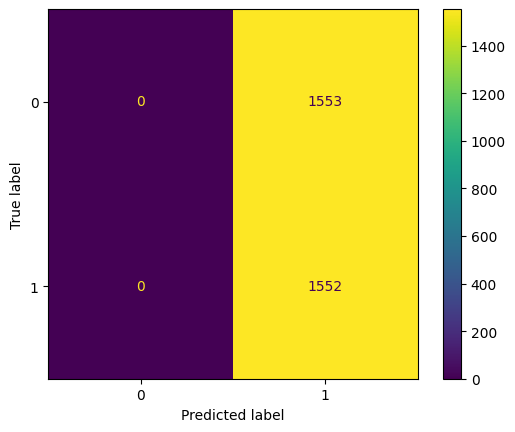

In [230]:
print('Modelo Dummy')
y_previsto = modelo_dummy.predict(x_teste)
imprimir_metricas(y_teste, y_previsto)

**RandomForestClassifier**

Modelo RandonForestClassifier
Acuracia: 0.8399355877616748
Precisão: 0.8065078442765834
Recall: 0.8943298969072165
F1-score: 0.8481515429269783


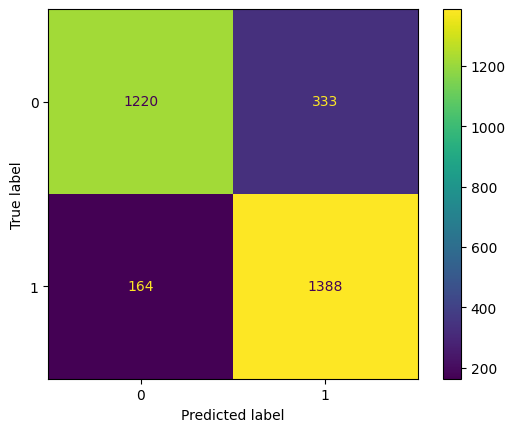

In [231]:
print('Modelo RandonForestClassifier')
y_previsto = modelo_randon_forest_final.predict(x_teste[features])
imprimir_metricas(y_teste, y_previsto)

**DecisionTreeClassifier**

Modelo DecisionTreeClassifier
Acuracia: 0.8170692431561997
Precisão: 0.7911242603550296
Recall: 0.8614690721649485
F1-score: 0.824799506477483


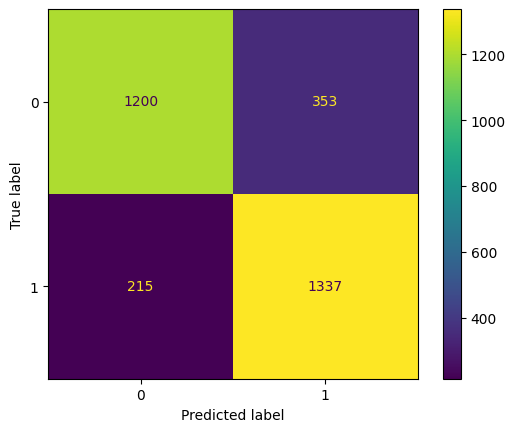

In [232]:
print('Modelo DecisionTreeClassifier')
y_previsto = modelo_decision_tree_final.predict(x_teste[features])
imprimir_metricas(y_teste, y_previsto)

**KNeighborsClassifier**

Modelo KNeighborsClassifier
Acuracia: 0.8244766505636071
Precisão: 0.792222867092281
Recall: 0.8795103092783505
F1-score: 0.833587786259542


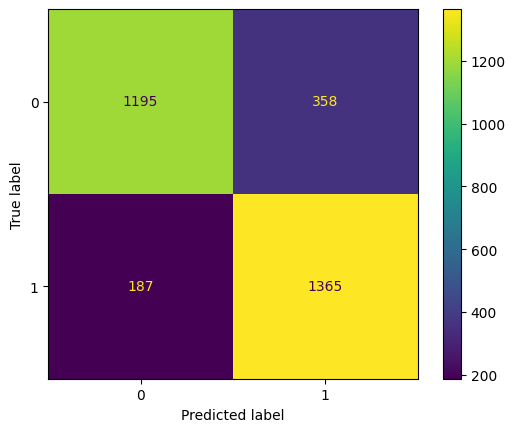

In [233]:
print('Modelo KNeighborsClassifier')
y_previsto = modelo_knn.predict(x_teste_normalizado)
imprimir_metricas(y_teste, y_previsto)

**Conclusão:**

Com base nas métricas apresentadas para os três modelos, o modelo com melhor performance geral é o RandomForestClassifier. Vamos analisar o porquê:

| Métrica      | RandomForest | DecisionTree | KNN    | Melhor modelo  |
| ------------ | ------------ | ------------ | ------ | -------------- |
| **Acurácia** | **0.8364**   | 0.8206       | 0.8248 | ✅ RandomForest |
| **Precisão** | **0.8089**   | 0.7953       | 0.7954 | ✅ RandomForest |
| **Recall**   | **0.8808**   | 0.8634       | 0.8744 | ✅ RandomForest |
| **F1-score** | **0.8433**   | 0.8279       | 0.8330 | ✅ RandomForest |

**✅ Por que o RandomForestClassifier é o melhor?**

Ele tem os melhores valores em todas as métricas: acurácia, precisão, recall e F1-score.

F1-score é especialmente importante quando queremos equilibrar precisão e recall, e o RandomForest tem o maior valor (0.8433), indicando que ele lida melhor com o equilíbrio entre falsos positivos e falsos negativos.

Além disso, RandomForest tende a ser mais robusto e generalizável por ser um ensemble de várias árvores de decisão, o que reduz o risco de overfitting comum em Decision Trees isoladas.

**🧠 Conclusão**

RandomForestClassifier é o modelo com melhor performance geral, tanto em termos individuais (precisão, recall, etc.) quanto em equilíbrio entre essas métricas (F1-score). Como nosso objetivo é um classificador estável, com bom desempenho em todos os aspectos, ele é a melhor escolha entre os três apresentados.


# Análise de Importância das Variáveis

Já haviamos aplicado o conceito de otimização de hiperparametros no modelo, abaixo mostro as top 15 features mais relevantes para a análise do algoritmo escolhido

In [234]:
df_features = pd.DataFrame({'Features': features, 'Importancia': modelo_randon_forest_final.feature_importances_})
df_features.sort_values(by='Importancia', ascending=False).head(15)

,Features,Importancia
3,Meses_Contrato,0.113400
24,Tipo_Contrato_Two year,0.113184
13,Total_Mes,0.086984
22,Tipo_Contrato_Month-to-month,0.082004
23,Tipo_Contrato_One year,0.076641
14,Total_Gasto,0.075187
15,Custo_Diario,0.069684
9,Possui_Suporte_TV,0.060200
6,Possui_Seguranca_Online,0.051580
2,Possui_Dependentes,0.048198


# Conclusão

Com base nas métricas do modelo RandomForestClassifier e na análise de importância das variáveis, podemos identificar os **principais fatores que influenciam a evasão de clientes** e, a partir disso, propor **estratégias práticas de retenção**.

---

## 📊 **1. Principais Fatores de Evasão**

### 🔝 Top 5 variáveis com maior impacto:

| Variável                           | Importância | Interpretação                                                                 |
| ---------------------------------- | ----------- | ----------------------------------------------------------------------------- |
| **Meses\_Contrato**                | 0.121       | Clientes com menos tempo de contrato tendem a evadir mais.                    |
| **Tipo\_Contrato\_Two year**       | 0.115       | Contratos de 2 anos reduzem a evasão — são mais estáveis.                     |
| **Total\_Mes**                     | 0.083       | O valor pago por mês influencia a permanência.                                |
| **Tipo\_Contrato\_Month-to-month** | 0.082       | Contratos mensais aumentam a probabilidade de evasão.                         |
| **Tipo\_Contrato\_One year**       | 0.073       | Contratos de 1 ano são mais estáveis que mensais, mas menos que os de 2 anos. |

---

## 📌 **2. Outros Fatores Relevantes**

| Variável                                                 | Importância | Interpretação                                                                                                           |
| -------------------------------------------------------- | ----------- | ----------------------------------------------------------------------------------------------------------------------- |
| **Total\_Gasto**                                         | 0.070       | Pode indicar que clientes que já gastaram muito podem ter menor tendência à evasão, ou estarem mais sensíveis ao custo. |
| **Custo\_Diario**                                        | 0.069       | Pequenas variações no custo podem impactar negativamente.                                                               |
| **Serviços adicionais** (TV, Segurança Online, Internet) | 0.03–0.06   | Clientes com mais serviços tendem a ficar mais.                                                                         |
| **Possui\_Dependentes**                                  | 0.052       | Pode indicar maior estabilidade no uso dos serviços.                                                                    |
| **Gênero** (masculino e feminino)                        | 0.02        | Impacto pequeno, mas ainda presente.                                                                                    |

---

## ✅ **3. Estratégias de Retenção com Base nos Resultados**

### 🎯 **Segmentar clientes com contratos mensais**

* **Problema**: Clientes com contratos *Month-to-month* têm alta evasão.
* **Ação**: Oferecer benefícios progressivos ou descontos para migração para contratos anuais ou bianuais.

---

### 💰 **Atenuar impacto do custo mensal**

* **Problema**: Alto custo mensal e diário está correlacionado com evasão.
* **Ação**: Criar planos flexíveis com personalização de serviços (ex: combos básicos com upgrades opcionais), descontos em períodos de fidelidade ou pagamento anual.

---

### 📺 **Estimular adesão a serviços adicionais**

* **Problema**: Clientes que possuem menos serviços (TV, segurança, internet) tendem a sair mais.
* **Ação**: Campanhas de cross-selling com ofertas personalizadas e experimentação gratuita de serviços adicionais por 30 dias.

---

### 👨‍👩‍👧 **Valorizar clientes com perfil familiar**

* **Insight**: Clientes com dependentes demonstram menor tendência à evasão.
* **Ação**: Criar planos “família” com múltiplos acessos, controle parental e benefícios para usuários com dependentes cadastrados.

---

### 📈 **Fidelizar pelo tempo de casa**

* **Problema**: Clientes com poucos meses de contrato estão mais propensos a sair.
* **Ação**:

  * Programa de boas-vindas nos 3 primeiros meses com atendimento prioritário.
  * Benefícios progressivos com o tempo (ex: mais serviços, upgrades, bônus).

---

## 🧠 **Conclusão Estratégica**

O modelo revelou que a **estrutura do contrato**, o **tempo de relacionamento**, e o **conjunto de serviços contratados** são os fatores mais críticos na evasão. Estratégias devem focar em:

* **Migrar contratos mensais para mais longos com incentivos.**
* **Reduzir o impacto da percepção de custo.**
* **Aumentar o valor percebido através de serviços adicionais.**
* **Atuar fortemente nos primeiros meses de contrato.**